In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
def clean(w):
    aux = ''
    for c in w.strip().lower():
        if c == ')' or c == '(':
            continue
        aux += c
    return aux

In [3]:
civ = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/civilservants.csv')['CIVILSERVANTS '].tolist()
org = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/organizations.csv')['ORGANIZATIONS '].tolist()
pla = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/places.csv')['PLACES '].tolist()
pro = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/prosecuted.csv')['PROSECUTED '].tolist()

In [4]:
civ = list(set([clean(w) for w in civ]))
civ = list(set([w for word in civ for w in word.split() ]))
org = list(set([clean(w) for w in org]))
org = list(set([w for word in org for w in word.split() ]))
pla = list(set([clean(w) for w in pla]))
pla = list(set([w for word in pla for w in word.split() ]))
pro = list(set([clean(w) for w in pro]))
pro = list(set([w for word in pro for w in word.split() ]))

In [5]:
ints = {}
data = {
    'civ':civ,
    'org':org,
    'pla':pla,
    'pro':pro
}

In [6]:
data['civ']

['arquimedez',
 'ladislao',
 'uranga',
 'ross',
 'cumminga',
 'barquin',
 'alcaraz',
 'marreno',
 'crispin',
 'prudente',
 'adela',
 'geminis',
 'armelgol',
 'creel',
 'guerrero',
 'jorge',
 'rochin',
 'bariban',
 'menchaca',
 'caros',
 'ministerio',
 'dimas',
 'analco',
 'schnoeder',
 'irma',
 'beltran',
 'correal',
 'tomasa',
 'renferi',
 'duclos',
 'onesimo',
 'escarcega',
 'mendizabal',
 'romo',
 'belem',
 'melchor',
 'terrazas',
 'mussino',
 'elena',
 'florencio',
 'peintert',
 'pola',
 'mota',
 'peraza',
 'guillermina',
 'oliverio',
 'scherer',
 'barriguete',
 'escalona',
 'fontecheca',
 'ballow',
 'amancio',
 'toledano',
 'barbera',
 'enedina',
 'zaragazo',
 'othon',
 'sales',
 'becarra',
 'bellizzia',
 'libraso',
 'ontiveros',
 'conde',
 'arnulfo',
 'saldivar',
 'leonor',
 'suastegui',
 'gallastegui',
 'farril',
 'malda',
 'izquierdo',
 'malo',
 'serafin',
 'olamendi',
 'policia',
 'utrilla',
 'pizarro',
 'valadez',
 'justino',
 'ibarrola',
 'alejani',
 'jacome',
 'rohana',
 'r

In [7]:
for k1 in data:
    for k2 in data:
        cont = {}
        for w in data[k1]:
            if w in data[k2]:
                #cont += 1
                cont[w] = cont.get(w, 0) + 1
        ints[f'{k1}_{k2}'] = cont

In [23]:
ints['pla_pro']

{'valdivieso': 1,
 'campos': 1,
 'moroleon': 1,
 'sada': 1,
 'magdalena': 1,
 'valle': 1,
 'jaramillo': 1,
 'iturbe': 1,
 'lagunas': 1,
 'jacinto': 1,
 'maximino': 1,
 'hinojosa': 1,
 'calvario': 1,
 'marquez': 1,
 'angeles': 1,
 'henry': 1,
 'cortes': 1,
 'gustavo': 1,
 'mira': 1,
 'pages': 1,
 'cardel': 1,
 'quimico': 1,
 'palomar': 1,
 'cuahutemoc': 1,
 'celis': 1,
 'roble': 1,
 'revilla': 1,
 'asuncion': 1,
 'carrizales': 1,
 'agustin': 1,
 'catalina': 1,
 'ordaz': 1,
 'dios': 1,
 'florencio': 1,
 'alegre': 1,
 'robles': 1,
 'nativitas': 1,
 'natividad': 1,
 'm': 1,
 'navarro': 1,
 'honda': 1,
 'cimental': 1,
 'huertas': 1,
 'sahagun': 1,
 'alvares': 1,
 'ho': 1,
 'felix': 1,
 'rosario': 1,
 'ana': 1,
 'villaflores': 1,
 'asis': 1,
 'prieto': 1,
 'millan': 1,
 'almada': 1,
 'marroquin': 1,
 'fuentes': 1,
 'silvestre': 1,
 'santana': 1,
 'hermenegildo': 1,
 'casas': 1,
 'campo': 1,
 'sebastian': 1,
 'arista': 1,
 'elorza': 1,
 'verde': 1,
 'camarena': 1,
 'arenales': 1,
 'marques': 

In [26]:
ints

{'civ_civ': 4227,
 'civ_org': 471,
 'civ_pla': 788,
 'civ_pro': 2646,
 'org_civ': 471,
 'org_org': 3102,
 'org_pla': 1146,
 'org_pro': 553,
 'pla_civ': 788,
 'pla_org': 1146,
 'pla_pla': 5074,
 'pla_pro': 976,
 'pro_civ': 2646,
 'pro_org': 553,
 'pro_pla': 976,
 'pro_pro': 9539}

In [28]:
texts = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/JusticIA_DatosTranscripciones.csv')['Texto'][:1000].tolist()

In [29]:
texts_str = ' '.join(texts)

In [32]:
found = {}
for k in data:
    found[k] = {}
    for w in data[k]:
        try:
            res = [i.start() for i in re.finditer(w, texts_str)]
            if len(res) != 0:
                found[k][w] = len(res)
        except:
            print(w)

[sujeto
??
[demostenes
[victoria


In [33]:
def make_plots(data, save_path):
    for k in data:
        wordcloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(data[k])
        plt.figure(figsize=(50, 20))
        plt.title(k)
        plt.imshow(wordcloud)
        plt.savefig(os.path.join(save_path, f'{k}.png'))

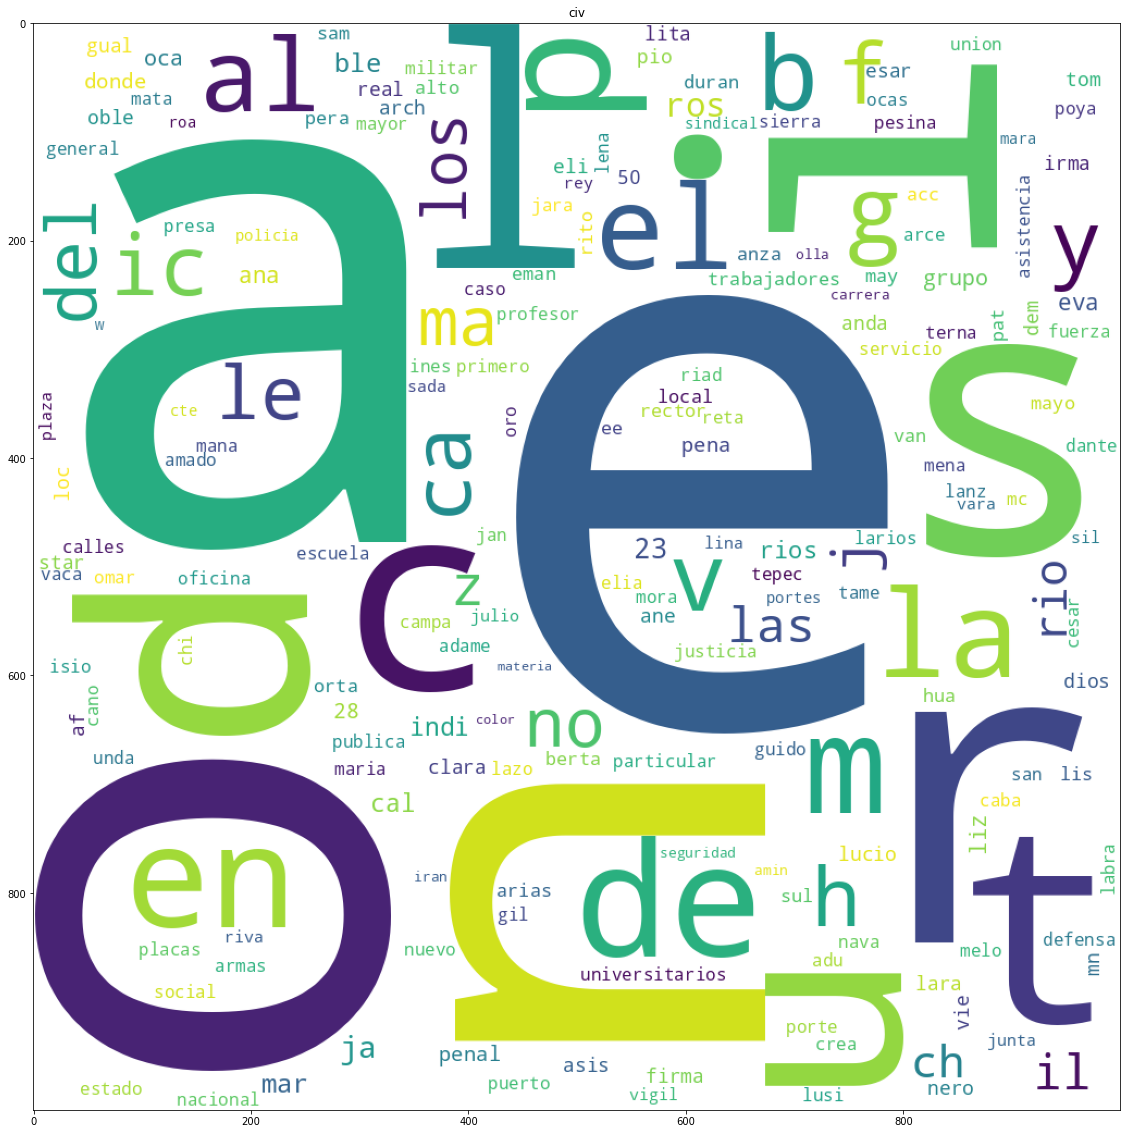

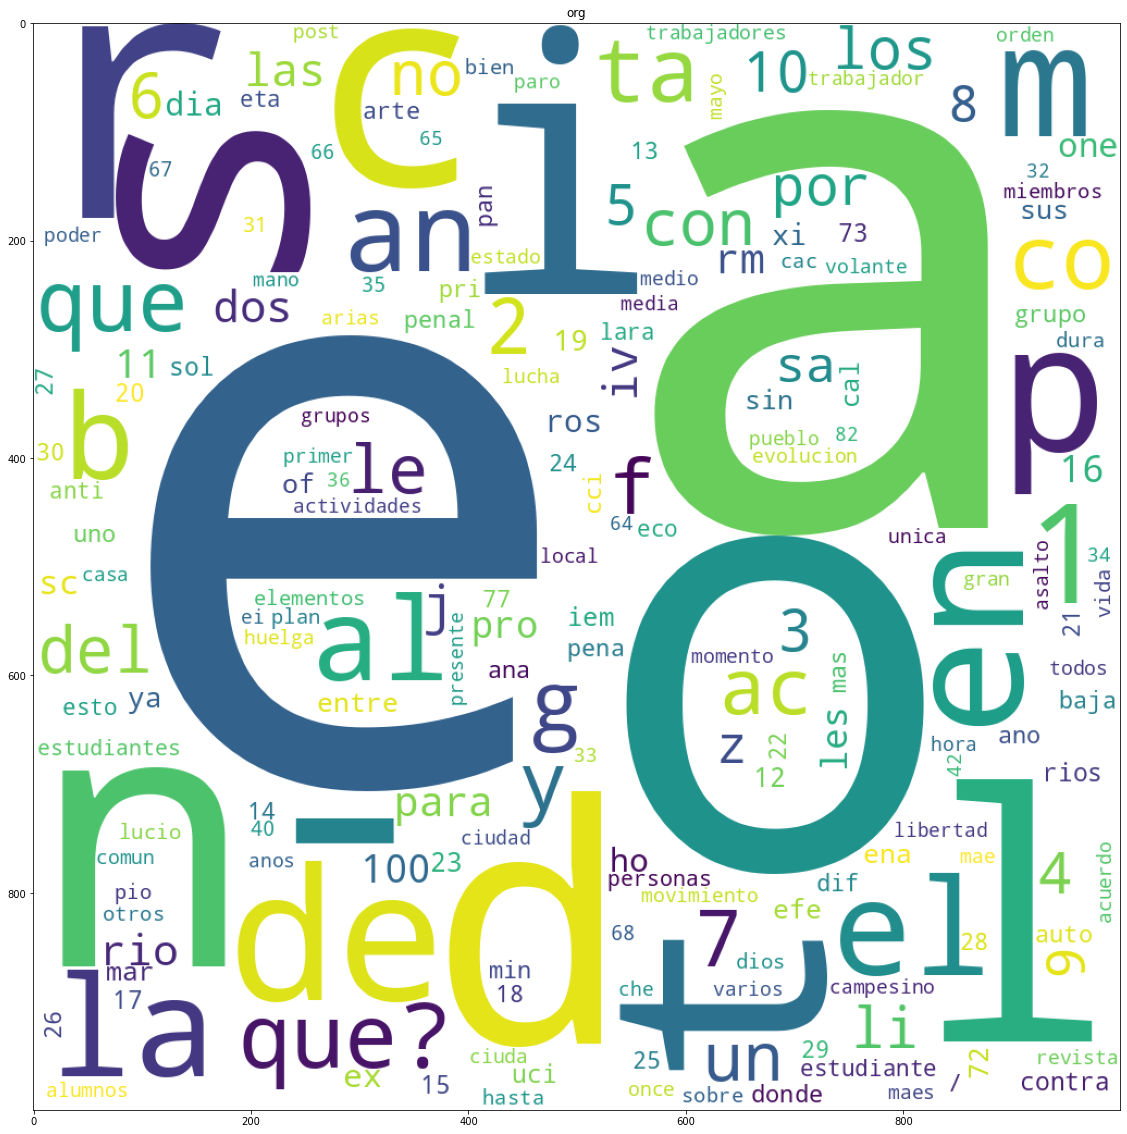

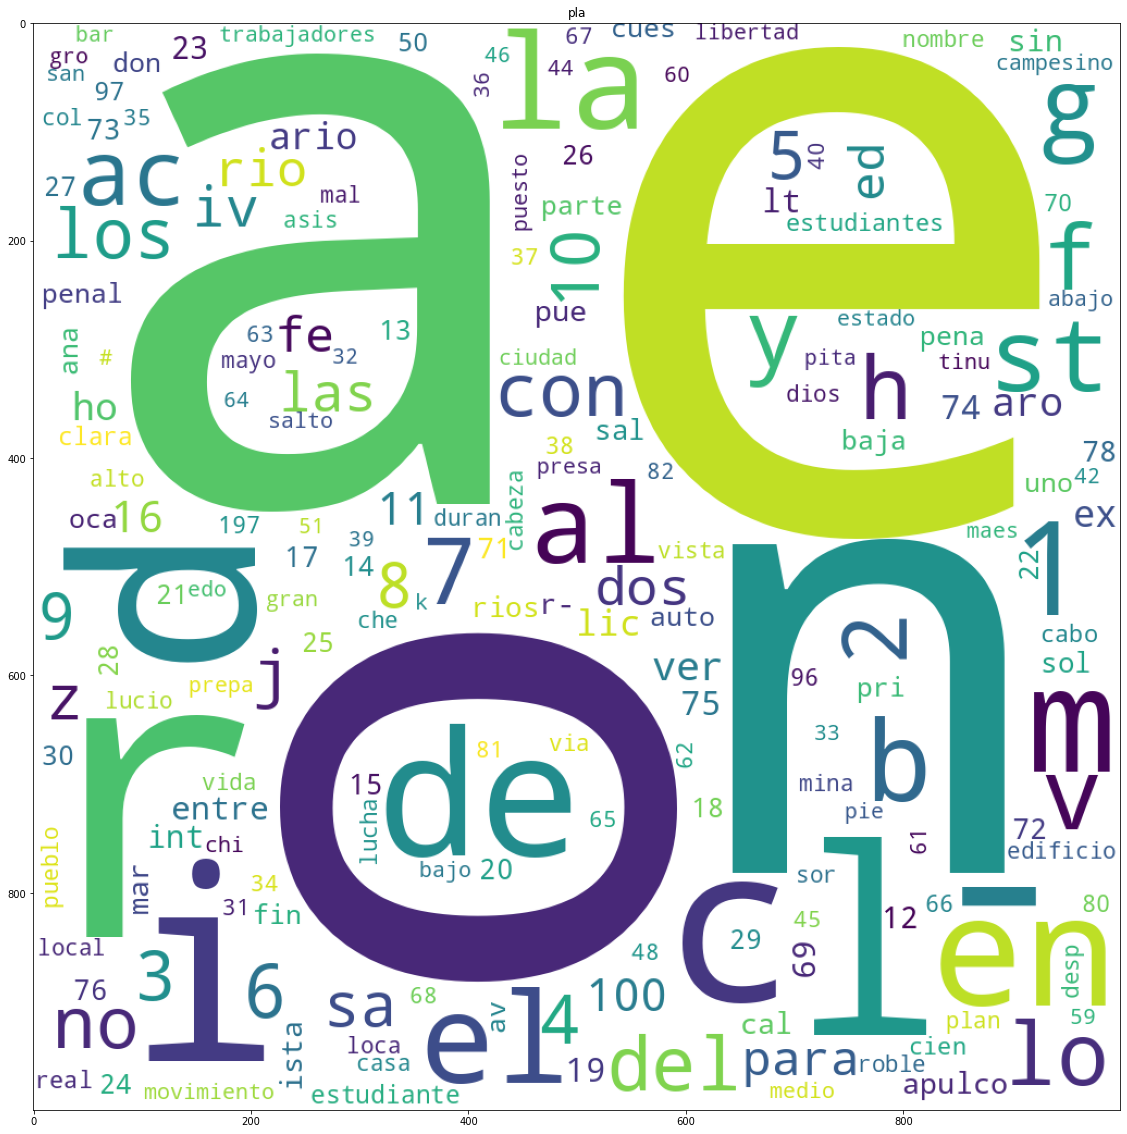

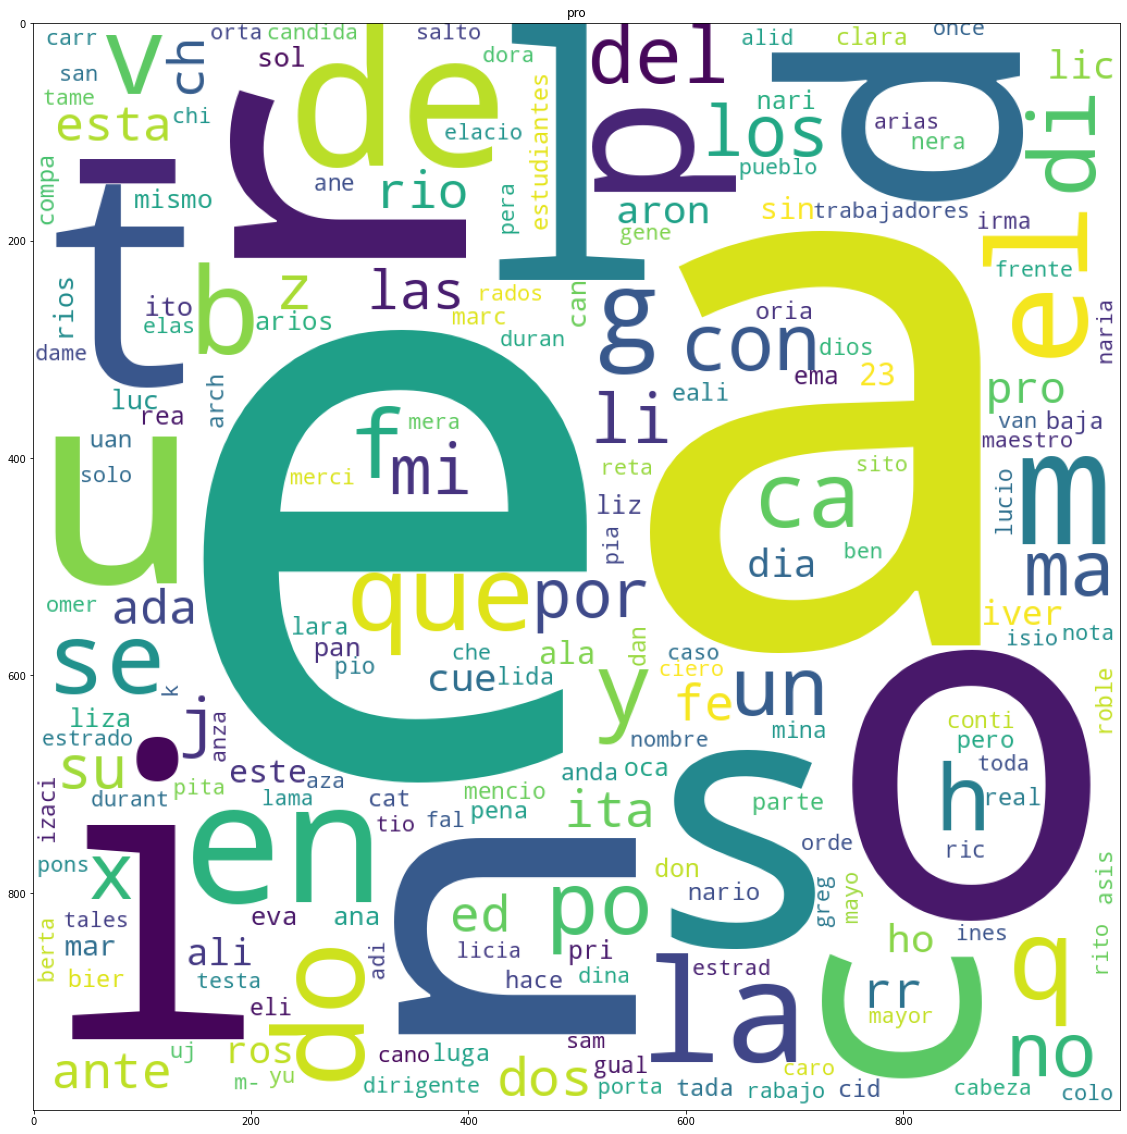

In [34]:
make_plots(found, 'text_inter')